In [10]:
from imgtools.io import read_dicom_auto
from imgtools.ops.functional import (
    #### Uncomment as needed #### 
    # bounding_box,
    # centroid,
    # clip_intensity,
    crop,
    # crop_to_mask_bounding_box,
    image_statistics,
    # min_max_scale,
    resample,
    resize,
    rotate,
    # standard_scale,
    # window_intensity,
    zoom,
)

In [ ]:
example_scan = read_dicom_auto('/home/joshua-siraj/Documents/BHKLAB/imgtools_test/RADCURE/RADCURE-0005/02-12-2002-NA-Research HNC Planning CT-48575/2.000000-Helical Axial-40982')
# example_scan = read_dicom_auto('/home/bioinf/bhklab/radiomics/readii-negative-controls/rawdata/RADCURE/images/dicoms/RADCURE-0005/StudyUID-48575/CT_SeriesUID-40982')
example_image = example_scan.image

# Helpers

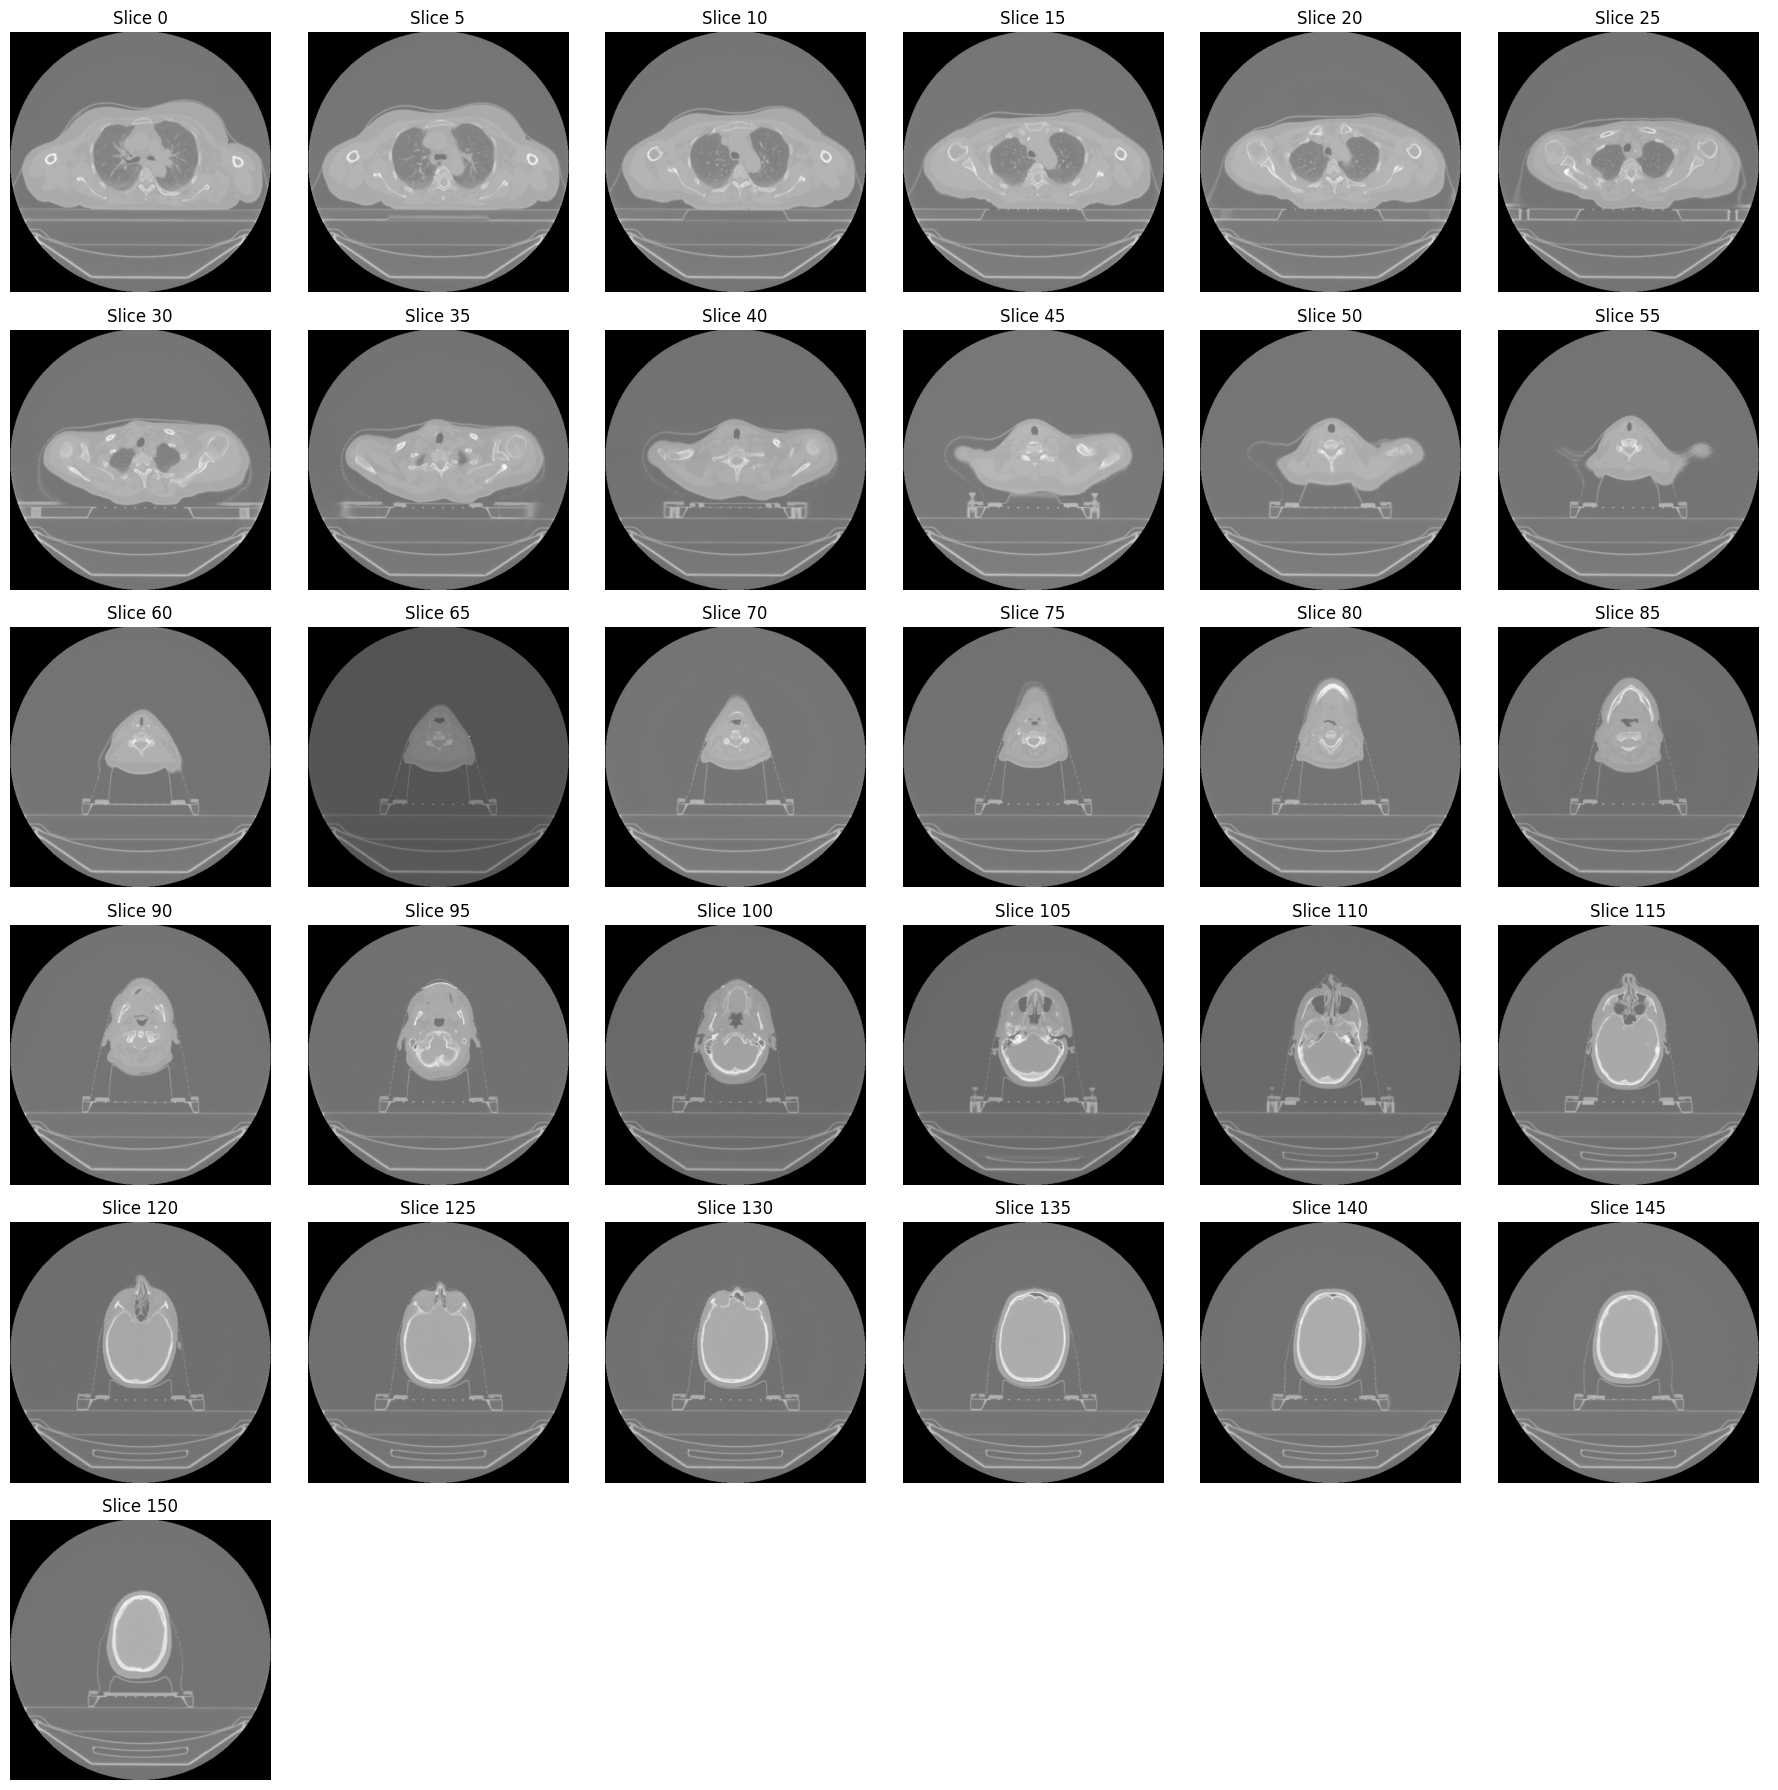

In [15]:
import math

import matplotlib.pyplot as plt
import SimpleITK as sitk


def visualize_3d_slices_adaptive(image: sitk.Image, axis: int = 0, step: int = 1):
    """
    Visualizes every n-th slice of a 3D SimpleITK image along a specified axis in an adaptive grid layout.

    Args:
        image (sitk.Image): The 3D SimpleITK image to visualize.
        axis (int): The axis along which to slice (0: x, 1: y, 2: z).
        step (int): The step size for selecting slices. Defaults to 1 (every slice).
    """
    array = sitk.GetArrayFromImage(image)
    num_slices = array.shape[axis]
    selected_slices = range(0, num_slices, step)
    num_selected_slices = len(selected_slices)

    # Calculate adaptive grid size
    cols = math.ceil(math.sqrt(num_selected_slices))
    rows = math.ceil(num_selected_slices / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.ravel()  # Flatten the axes for easy iteration

    for i, slice_index in enumerate(selected_slices):
        if axis == 0:
            slice_ = array[slice_index, :, :]
        elif axis == 1:
            slice_ = array[:, slice_index, :]
        elif axis == 2:
            slice_ = array[:, :, slice_index]

        axes[i].imshow(slice_, cmap='gray')
        axes[i].set_title(f'Slice {slice_index}')
        axes[i].axis('off')

    # Turn off unused axes
    for ax in axes[num_selected_slices:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

visualize_3d_slices_adaptive(example_image, axis=0, step=5)



# Image Statistics

In [16]:
image_statistics(example_image)

ImageStatistics(minimum=-3024.0, maximum=3071.0, sum=-50627285810.0, mean=-1270.577425956726, variance=965773.5438795656, standard_deviation=982.7377798169589)

# Resample

Original Spacing: (0.976562, 0.976562, 2.0)


Resampled Spacing: (1.0, 1.0, 1.0)


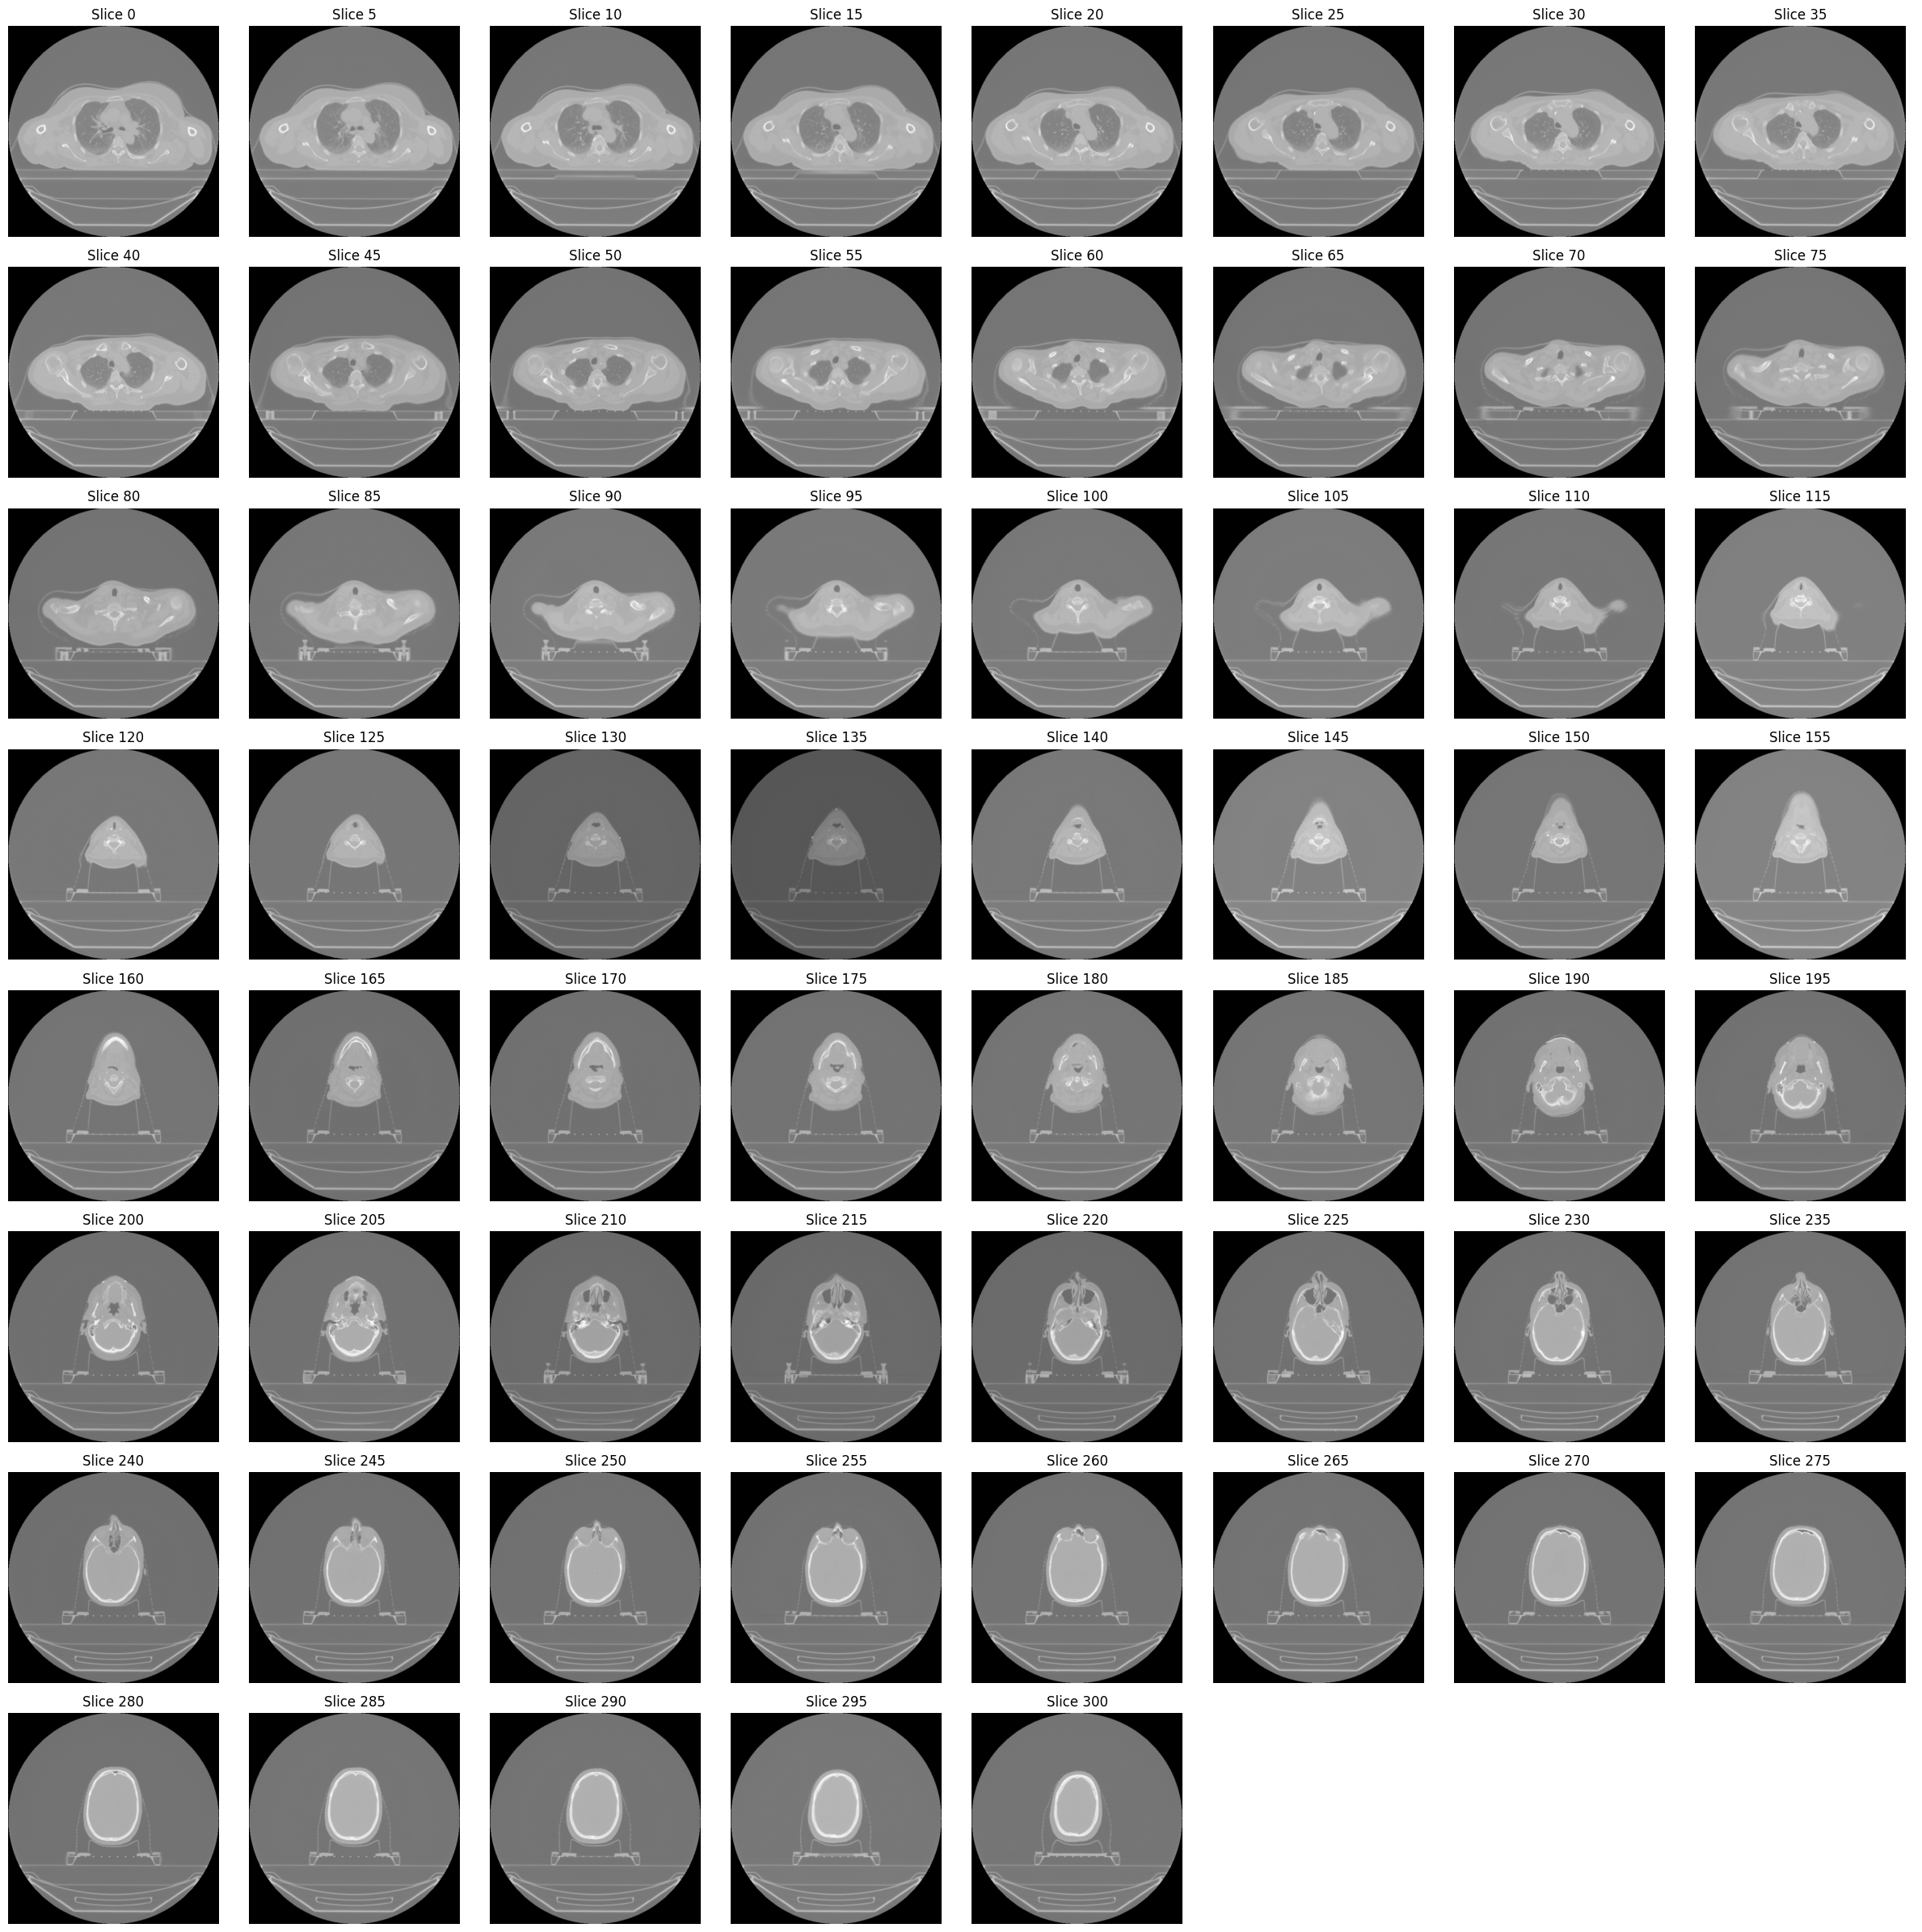

In [17]:
print('Original Spacing:', example_image.GetSpacing())
resampled_image = resample(example_image, [1, 1, 1])
print('Resampled Spacing:', resampled_image.GetSpacing())

visualize_3d_slices_adaptive(resampled_image, axis=0, step=5)

# Resize

Original Size: (512, 512, 152)
Resized Size: (256, 256, 152)


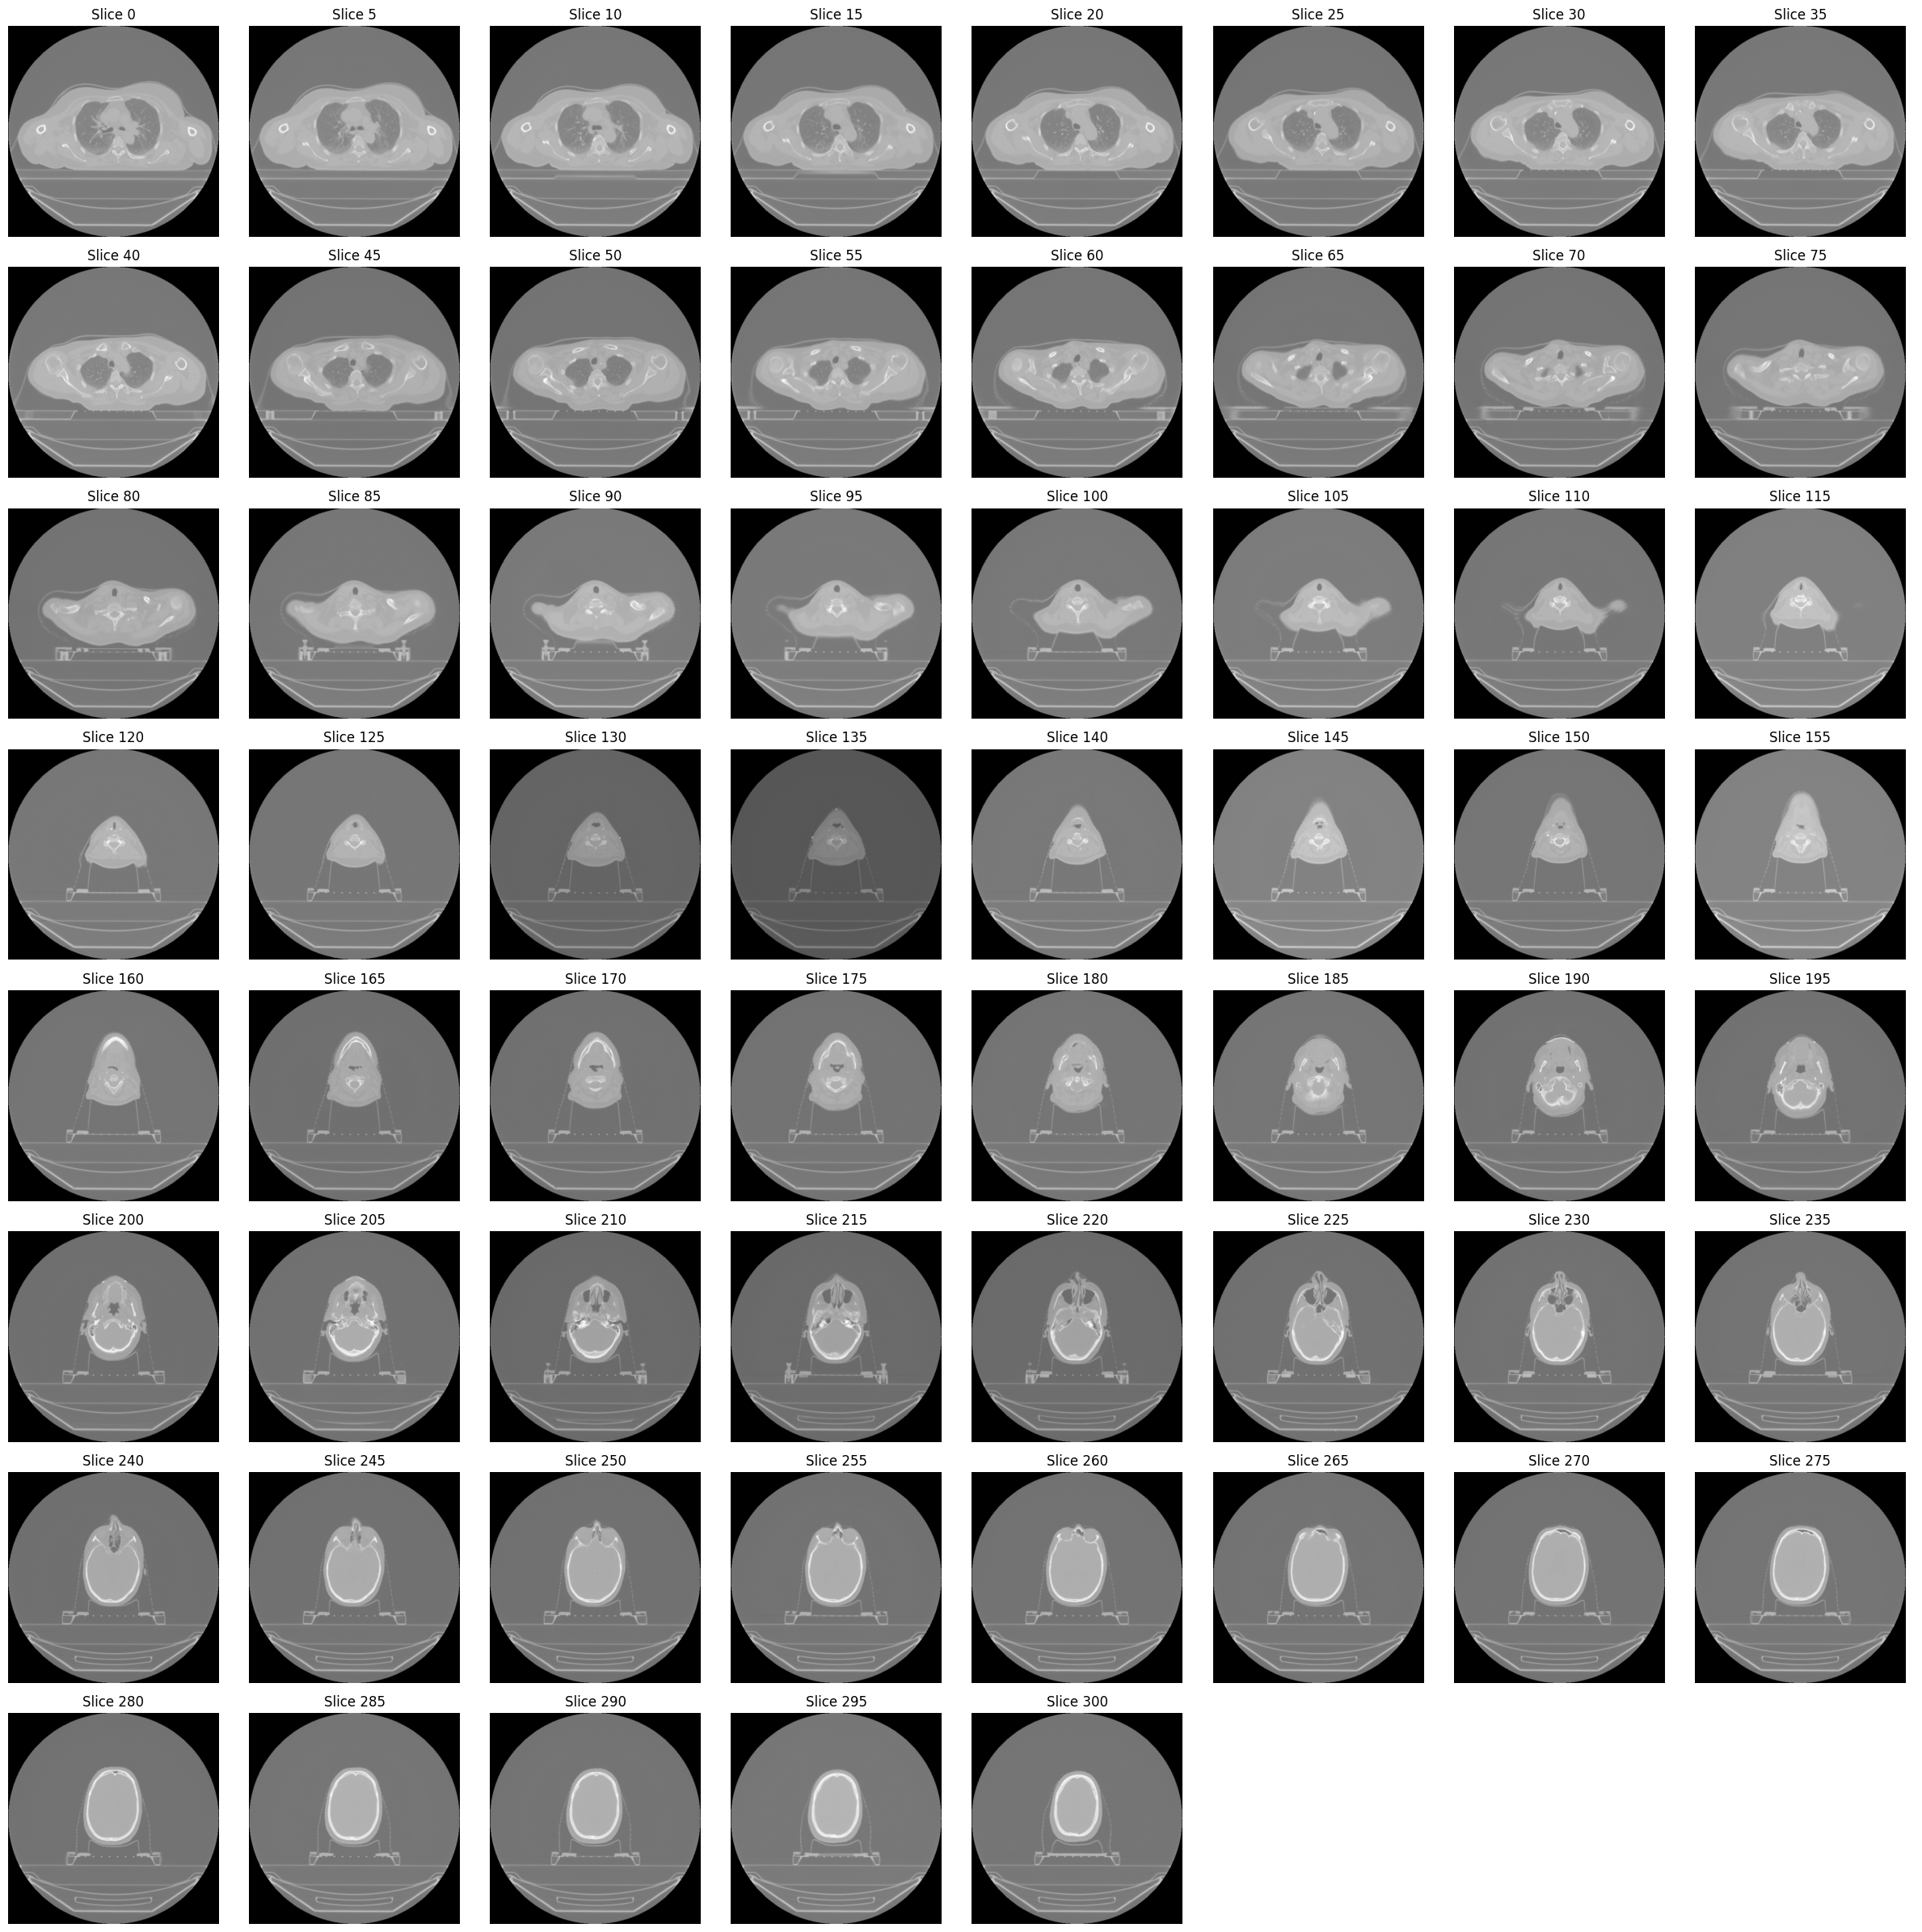

In [18]:
print('Original Size:', example_image.GetSize())
resized_image = resize(example_image, [256, 256, 0])
print('Resized Size:', resized_image.GetSize())

visualize_3d_slices_adaptive(resampled_image, axis=0, step=5)

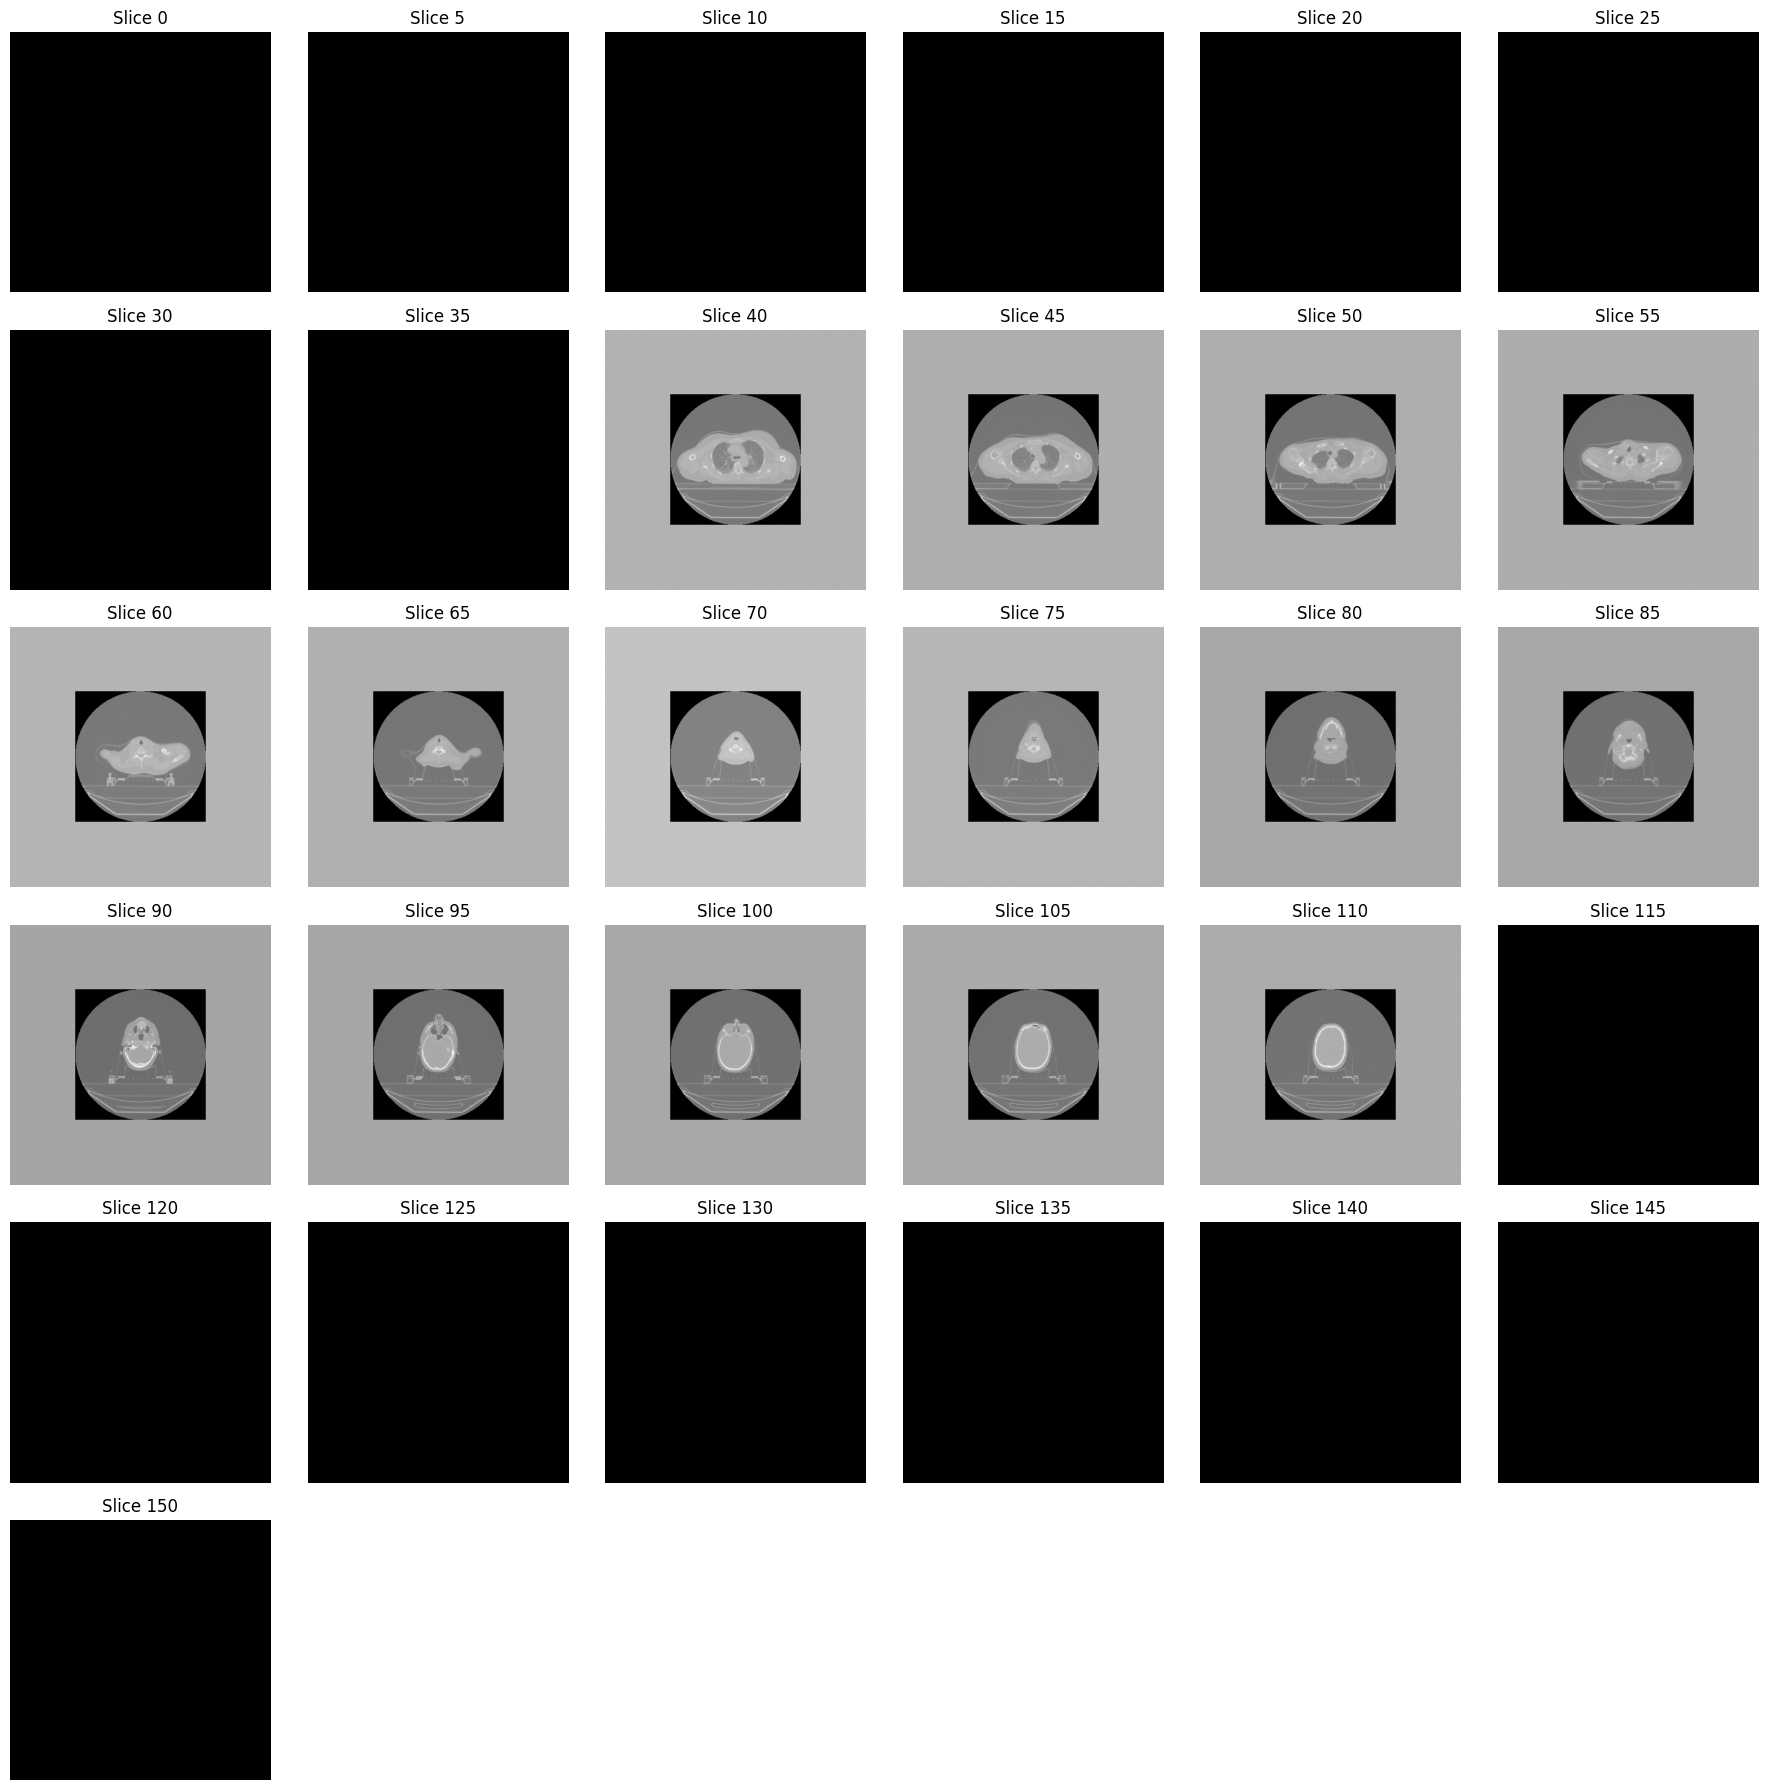

In [8]:
zoomed_image = zoom(example_image, 2.0)

visualize_3d_slices_adaptive(zoomed_image, axis=0, step=5)

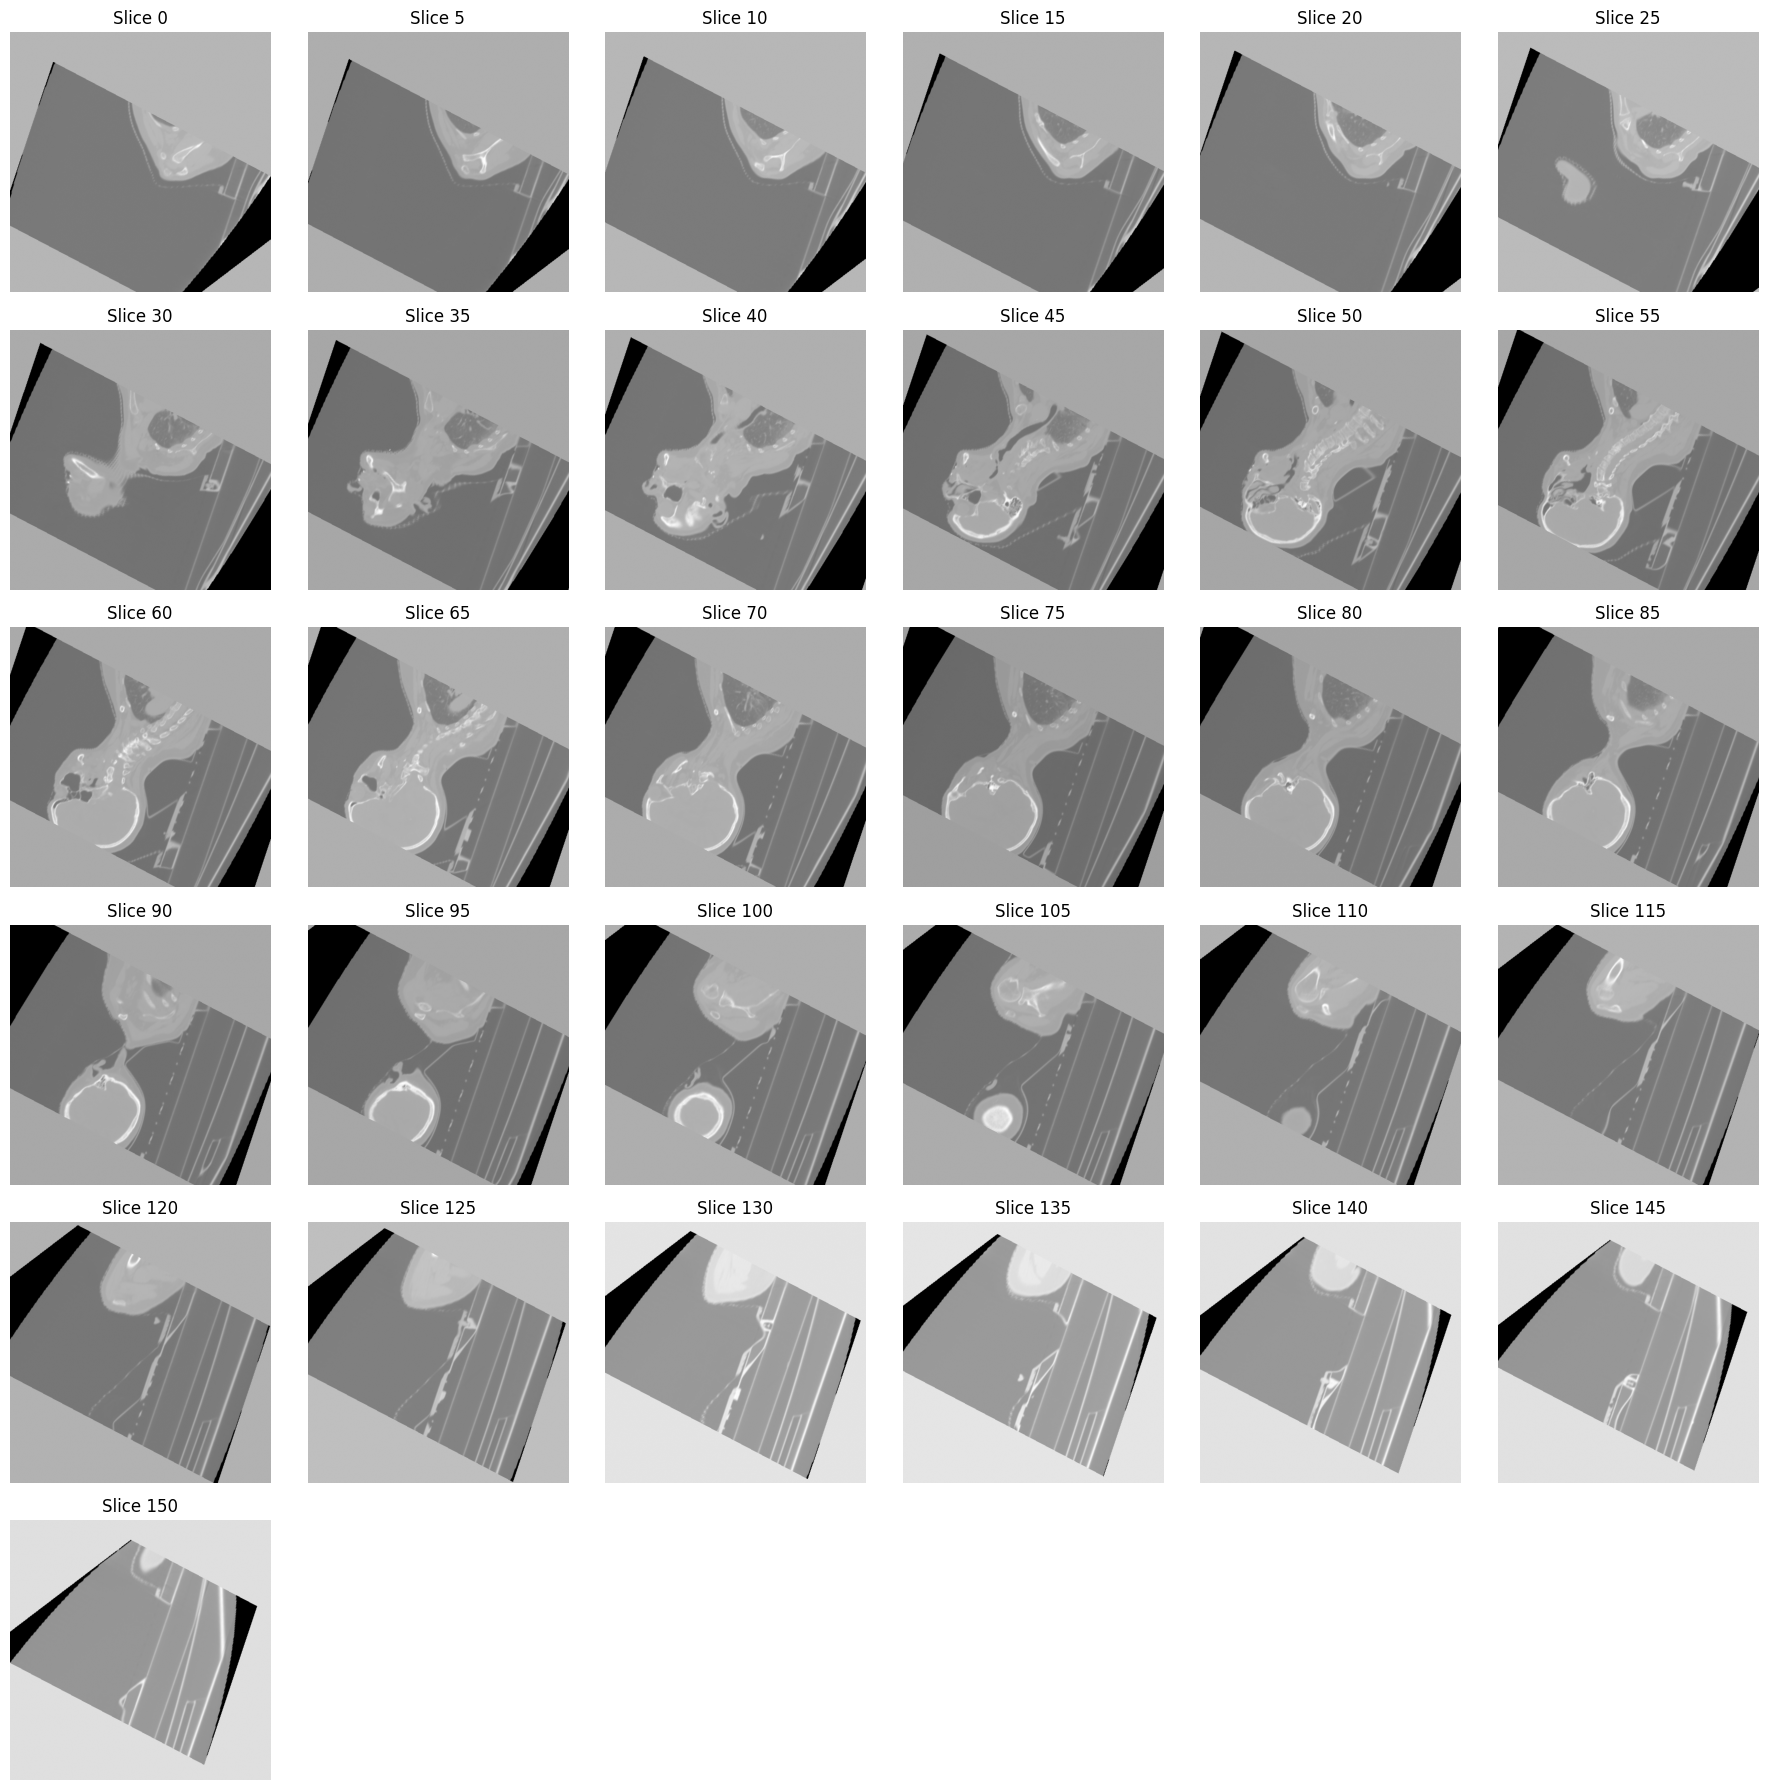

In [9]:
rotated_image = rotate(example_image, [256, 256, 60], [45, 45, 45])

visualize_3d_slices_adaptive(rotated_image, axis=0, step=5)

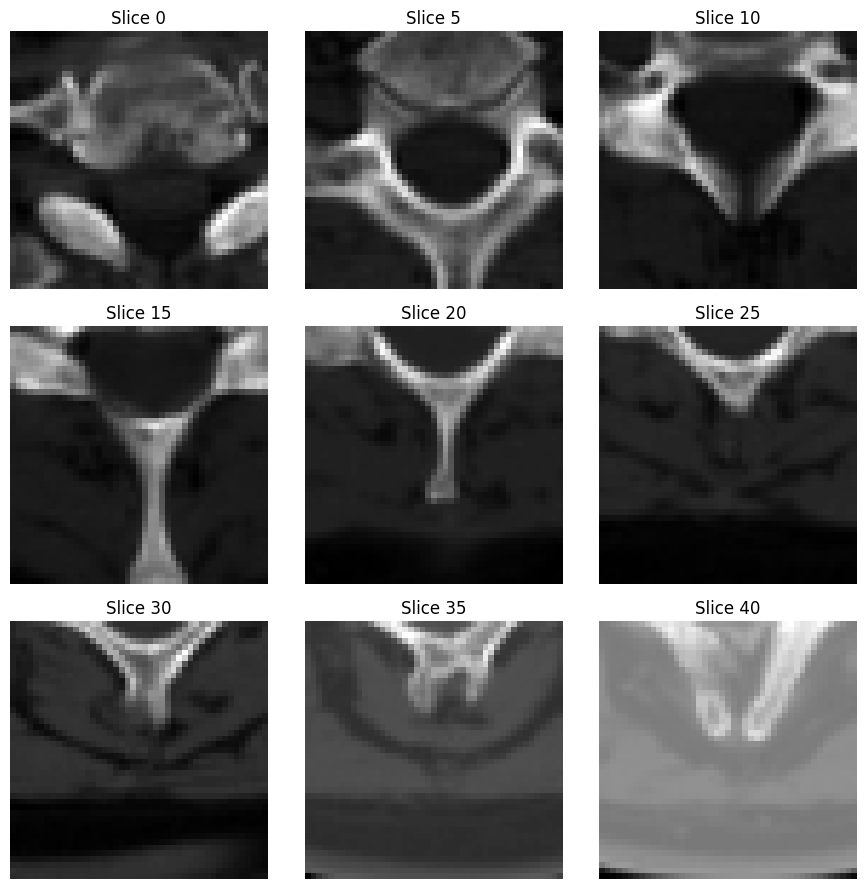

In [19]:
cropped_image = crop(example_image, [256, 256, 60], [45, 45, 45])

visualize_3d_slices_adaptive(cropped_image, axis=0, step=5)